In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data=pd.read_csv(r'D:\A.I\Machine Learning\DataSet\solarpower.csv')

In [3]:
data.head()

,date,cum_power
0,26/10/2011,0.1
1,27/10/2011,10.2
2,28/10/2011,20.2
3,29/10/2011,29.6
4,30/10/2011,34.2


In [4]:
data.describe()

,cum_power
count,2558.000000
mean,13461.057349
std,8129.192104
min,0.100000
25%,6665.350000
50%,13000.500000
75%,20183.750000
max,28120.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2558 entries, 0 to 2557
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       2558 non-null   object 
 1   cum_power  2558 non-null   float64
dtypes: float64(1), object(1)
memory usage: 40.1+ KB


In [6]:
data.isna().sum()

date         0
cum_power    0
dtype: int64

In [7]:
data.date=pd.to_datetime(data.date)

In [8]:
data.head()

,date,cum_power
0,2011-10-26,0.1
1,2011-10-27,10.2
2,2011-10-28,20.2
3,2011-10-29,29.6
4,2011-10-30,34.2


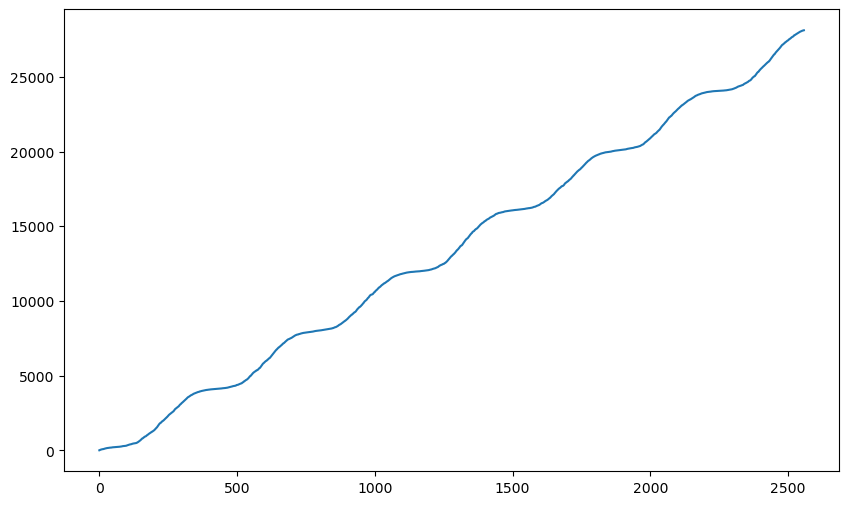

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(data['cum_power'])

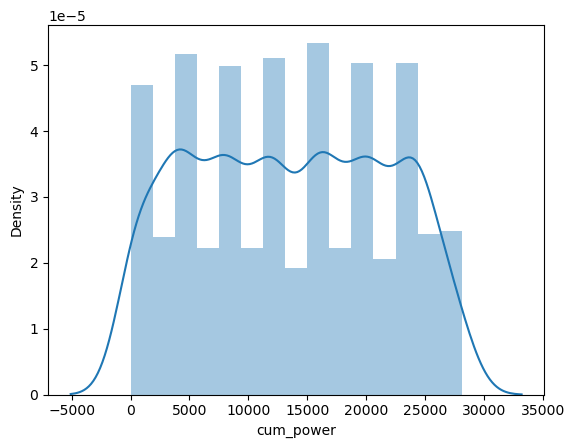

In [10]:
import seaborn as sns
sns.distplot(data['cum_power'])
plt.show()

In [11]:
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(12).mean() 
    rolstd = timeseries.rolling(12).std() 
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    


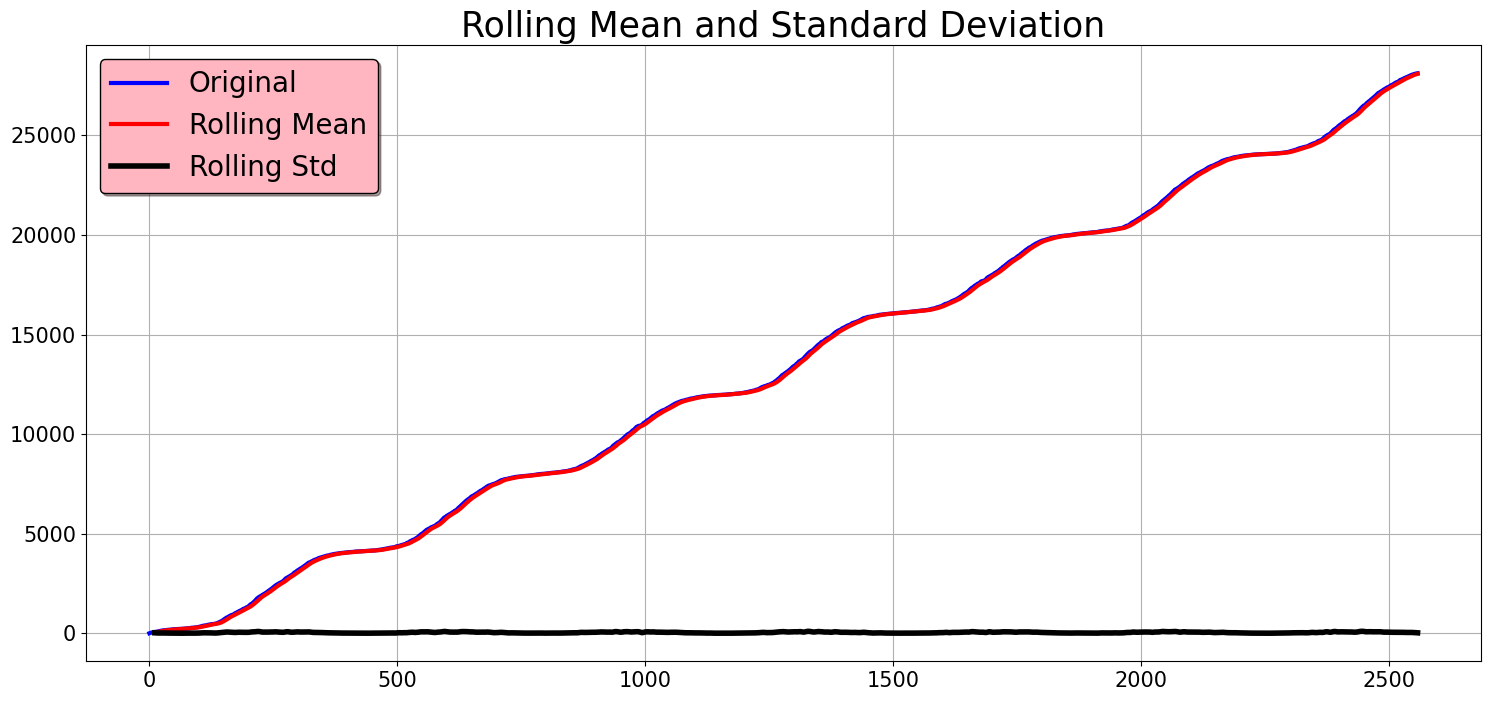

Results of dickey fuller test
Test Statistics                  -0.421484
p-value                           0.906449
No. of lags used                 20.000000
Number of observations used    2537.000000
critical value (1%)              -3.432930
critical value (5%)              -2.862680
critical value (10%)             -2.567377
dtype: float64


In [12]:
test_stationarity(data['cum_power'])

In [13]:
                               # forecasting

In [14]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

data.rename(columns={'date': 'ds', 'cum_power': 'y'}, inplace=True)

In [15]:
model = Prophet()
model.fit(data)

14:21:49 - cmdstanpy - INFO - Chain [1] start processing
14:21:51 - cmdstanpy - INFO - Chain [1] done processing


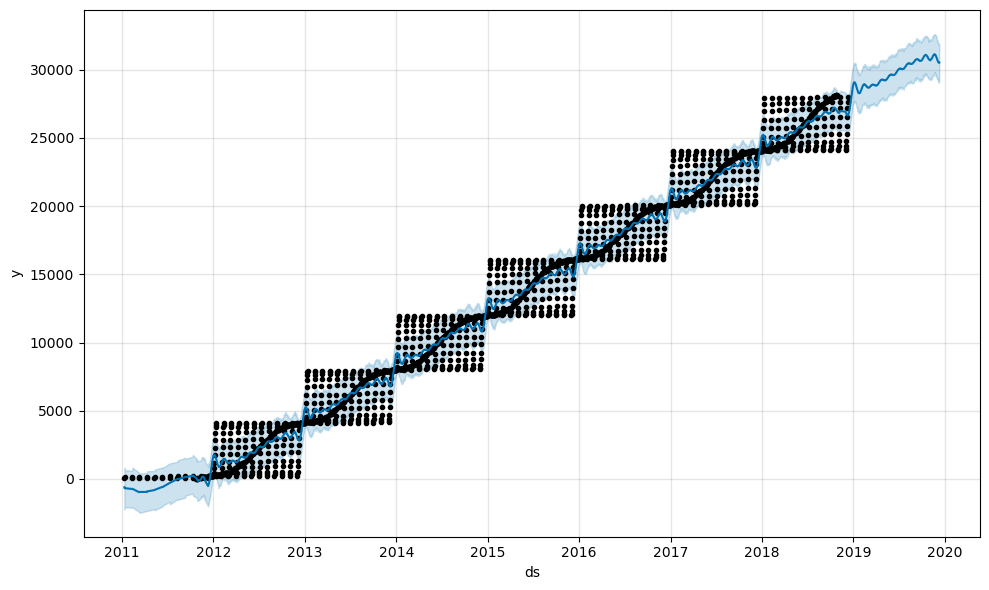

In [16]:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()

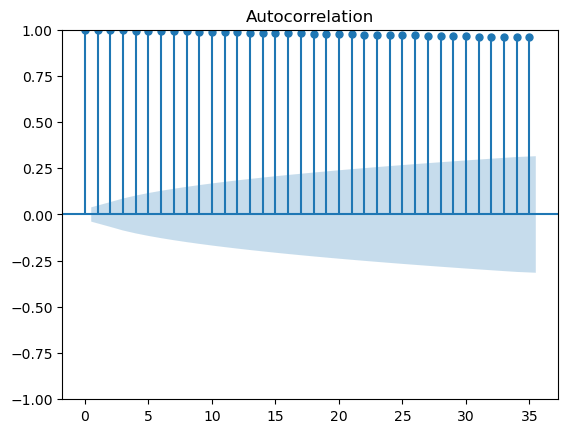

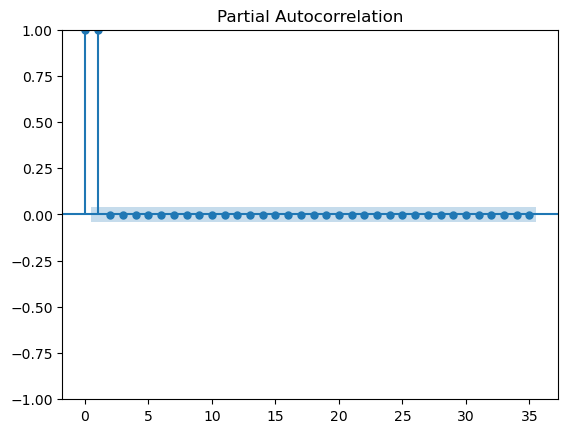

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data['y'])
plt.show()
plot_pacf(data['y'])
plt.show()

In [18]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['y'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -0.4214838638801597
p-value: 0.9064494730945681


In [19]:
                      ## ARIMA model

In [14]:
from statsmodels.tsa.arima.model import ARIMA

In [15]:
df = pd.read_csv(r'D:\A.I\Machine Learning\DataSet\solarpower.csv')
df.rename(columns={'date': 'ds', 'cum_power': 'y'}, inplace=True)
df['ds'] = pd.to_datetime(df['ds'])
df = df.set_index('ds').asfreq('D')

In [27]:
df

,y
ds,
2011-10-26,0.1
2011-10-27,10.2
2011-10-28,20.2
2011-10-29,29.6
2011-10-30,34.2
...,...
2018-10-22,28101.0
2018-10-23,28109.0
2018-10-24,28115.0


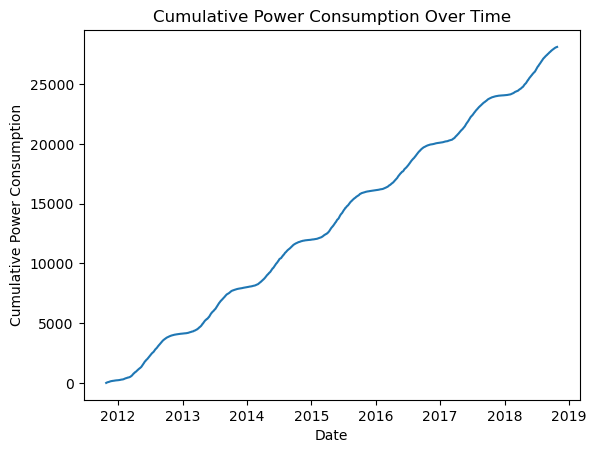

In [12]:
plt.plot(df['y'])
plt.xlabel('Date')
plt.ylabel('Cumulative Power Consumption')
plt.title('Cumulative Power Consumption Over Time')
plt.show()

In [16]:
order = (1, 0, 0) 
model = ARIMA(df['y'], order=order)
results = model.fit()

In [17]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2558
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -10336.111
Date:                Fri, 17 May 2024   AIC                          20678.221
Time:                        17:51:26   BIC                          20695.762
Sample:                    10-26-2011   HQIC                         20684.582
                         - 10-26-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.346e+04      0.000   1.29e+08      0.000    1.35e+04    1.35e+04
ar.L1          1.0000   3.02e-06   3.31e+05      0.000       1.000       1.000
sigma2       188.3267      6.217     30.293      0.000     176.142     200.512
===================================================================================
Ljung-Box (L1) (Q):                1413.40   Jarque-Bera (JB):               181.89
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.33   Skew:                             0.52
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.62e+20. Standard errors may be unstable.
"""

In [33]:
forecast=results.forecast(steps=10)

In [34]:
forecast

2018-10-27    28119.988407
2018-10-28    28119.976813
2018-10-29    28119.965220
2018-10-30    28119.953627
2018-10-31    28119.942033
2018-11-01    28119.930440
2018-11-02    28119.918847
2018-11-03    28119.907253
2018-11-04    28119.895660
2018-11-05    28119.884067
Freq: D, Name: predicted_mean, dtype: float64

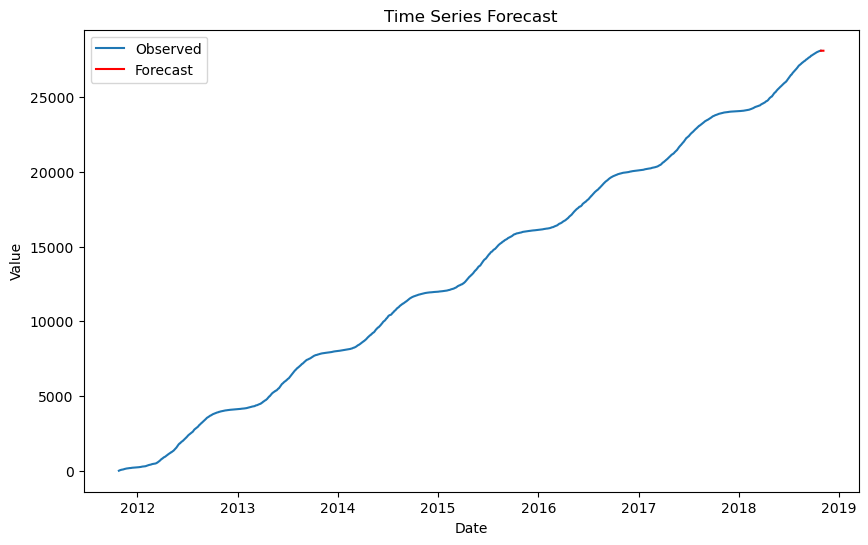

In [35]:
plt.figure(figsize=(10, 6))

plt.plot(df['y'], label='Observed')

plt.plot(forecast, label='Forecast', color='red')

plt.title('Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()
